<a href="https://colab.research.google.com/github/almaraj/Rossmann-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

**Data Science Solution framework**: Sales is the dependent variable having continuous data. hence the solution is to build an appropriate regression model to predict the "Sales" column for the test set.

**Performance Model Metric:** I would prefer using RMSE as the values in Sales is big so i need to penalize large prediction errors.


In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Mounting google drive in order to import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the store data as store_data and additional store dataset as store_info
store_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/7. Capstone Project-2(Yes bank)/Rossmann Stores Data.csv')
store_info = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/7. Capstone Project-2(Yes bank)/store.csv')

In [5]:
# Let's see if the right table has imported or not.
store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
# Let's see if the right table has imprted or not.
store_info.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Oh! Now the notebook is Loded and Locked, Hey! data are you ready to Combat ;)

#EDA

In [7]:
# Let's start thinking about the first dataframe given i.e. stote-sales data
store_data.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-06-09,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [8]:
store_data.shape

(1017209, 9)

So in this Dataset we have 1017209 observations and 9 features.Lets dive deep in each features for more insightes.

##Feature "Store"

In [9]:
store_data['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [10]:
store_data['Store'].value_counts(sort=False)

512     758
1024    942
1       942
513     942
1025    942
       ... 
1021    942
510     942
1022    942
511     942
1023    942
Name: Store, Length: 1115, dtype: int64

**Store -->** Store column cotains a unique id for individual store. Here it can be observed that all 1017209 entries only we have 1115 distinct store data and each store has huge no. of repeated entries. So we have to look other features for more justification on that, why huge no. of repeated entries.

## Feature "DayOfWeek"

In [11]:
store_data['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

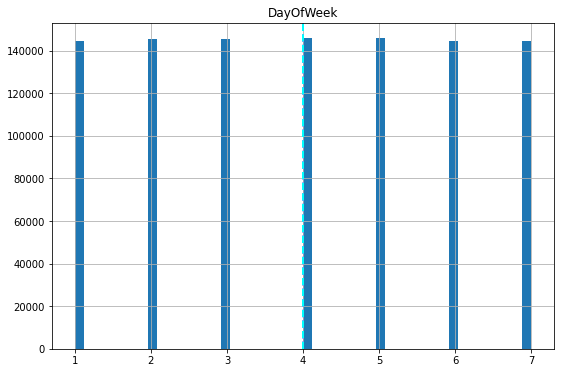

In [14]:
# plot a bar plot for feature count
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = store_data['DayOfWeek']
feature.hist(bins=50, ax = ax)
ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
ax.set_title('DayOfWeek')
plt.show()

**DayOfWeek -->** In this feature we have only 7 distinct values indicates 7 days in a weekand we can see the value counts are same for all 7 days, equally distributed data.

## Feature "Date"

In [15]:
store_data['Date'].max()

'2015-07-31'

In [16]:
store_data['Date'].min()

'2013-01-01'

**Date -->** Here if we compare the max and min alues in date we can conclude that we have data of two and half years.

## Feature "StateHoliday"

In [17]:
store_data['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

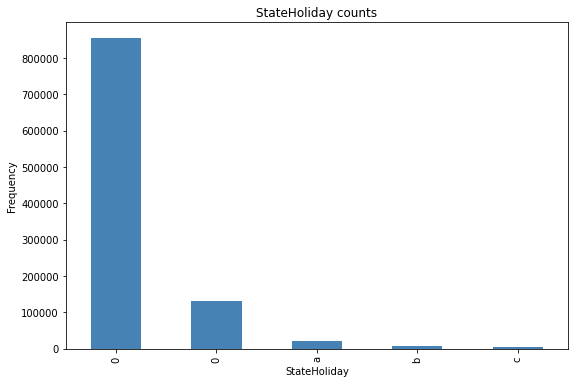

In [20]:
# plot a bar plot for feature count
counts = store_data['StateHoliday'].value_counts().sort_values(ascending = False)
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
counts.plot.bar(ax = ax, color='steelblue')
ax.set_title('StateHoliday' + ' counts')
ax.set_xlabel('StateHoliday') 
ax.set_ylabel("Frequency")
plt.show()

**StateHoliday -->** indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

We can easily observe here that state holidays are very less in compare to the whole dataset and there are two datatypes difined for 0, so we have to fix that in later feature engineering part.


Other remaining Features are:

**Customers -->** the number of customers on a given day.

**Open -->** an indicator for whether the store was open: 0 = closed, 1 = open.

**SchoolHoliday -->** indicates if the (Store, Date) was affected by the closure of public schools.